In [64]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import matplotlib.patches as mpatches
import matplotlib.lines as mlines



In [7]:
img = cv2.imread('warped.jpg', cv2.IMREAD_GRAYSCALE)

/tmp/ipykernel_35801/1275490999.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/tmp/ipykernel_35801/1275490999.py:19: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
/tmp/ipykernel_35801/1275490999.py:18: RuntimeWarning: invalid value encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2


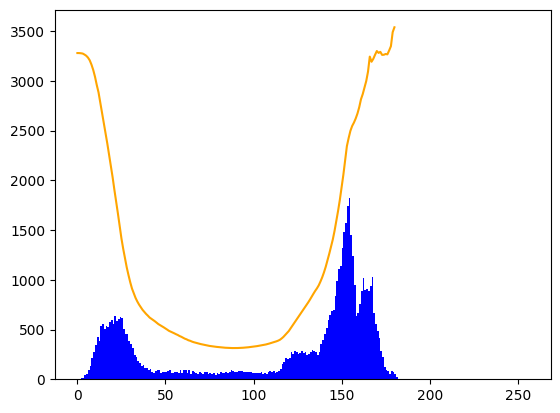

In [28]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = hist.ravel() / hist.sum()
Q = hist.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

# Plot hist 
plt.hist(img.ravel(), 256, [0, 256], color='blue')


values = []
# Per point i want the in-class variance
for i in range(1, 256):
    p1, p2 = np.hsplit(hist, [i])
    q1, q2 = Q[i], Q[255] - Q[i]
    b1, b2 = np.hsplit(bins, [i])
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
    fn = v1 * q1 + v2 * q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    values.append(fn)

plt.plot(values, color='orange')
plt.show()






/tmp/ipykernel_35801/436357666.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/tmp/ipykernel_35801/436357666.py:16: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
/tmp/ipykernel_35801/436357666.py:15: RuntimeWarning: invalid value encountered in scalar divide
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2


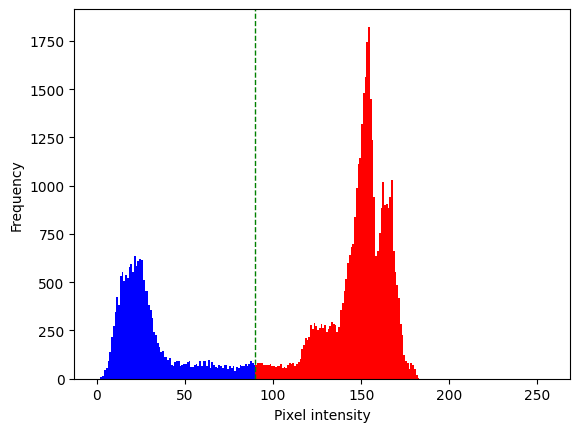

In [39]:
# Calculate histogram and normalize
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = hist.ravel() / hist.sum()
Q = hist.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

values = []
# Per point calculate the in-class variance
for i in range(1, 256):
    p1, p2 = np.hsplit(hist, [i])
    q1, q2 = Q[i], Q[255] - Q[i]
    b1, b2 = np.hsplit(bins, [i])
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
    fn = v1 * q1 + v2 * q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    values.append(fn)

# Split the histogram into two at the threshold
below_thresh = img.ravel()[img.ravel() < thresh]
above_thresh = img.ravel()[img.ravel() >= thresh]

# Plot histogram with different colors for the two classes
plt.hist(below_thresh, bins=256, range=[0, 256], color='blue')
plt.hist(above_thresh, bins=256, range=[0, 256], color='red')
plt.axvline(thresh, color='green', linestyle='dashed', linewidth=1)
# plt.plot(values, color='orange')

plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')

plt.show()

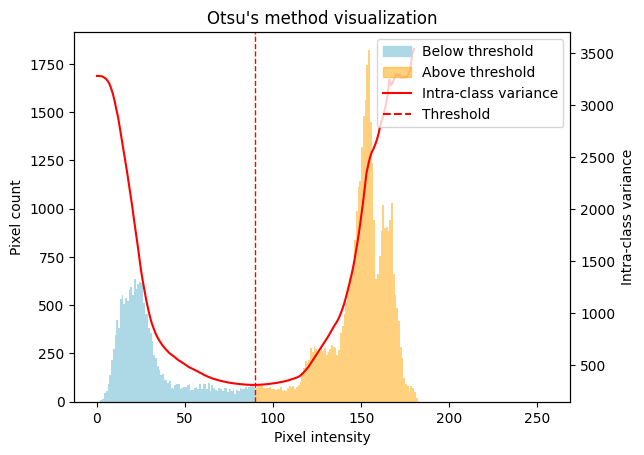

In [70]:
fig, ax1 = plt.subplots()
ax1.hist(below_thresh, 256, [0, 256], color='lightblue')
ax1.hist(above_thresh, 256, [0, 256], color='orange', alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(values, color='red')
plt.axvline(thresh, color='red', linestyle='dashed', linewidth=1)

ax1.set_xlabel('Pixel intensity')
ax1.set_ylabel('Pixel count')
ax2.set_ylabel('Intra-class variance')
plt.title('Otsu\'s method visualization')

# Add a legend
# Create custom legend
below_patch = mpatches.Patch(color='lightblue', label='Below threshold')
above_patch = mpatches.Patch(color='orange', label='Above threshold', alpha=0.5)
variance_line = mlines.Line2D([], [], color='red', label='Intra-class variance')
threshold_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Threshold')

plt.legend(handles=[below_patch, above_patch, variance_line, threshold_line], loc='upper right')
# save the plot
plt.savefig('otsu_visualization.png')


plt.show()


In [35]:
print(max(hist))
print(max(values))

0.03251337
3537.416346525822
